<a href="https://colab.research.google.com/github/Yadanar025/Vietnamese-Sign-Language-Translation-additionalfiles/blob/main/Sign%20Language%20Translator/File_Checking_NPY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== DETAILED ANALYSIS ===
Total values: 126
Non-zero values: 0
Zero values: 126
Percentage zeros: 100.0%
First zero at index: 0
All zeros are at the end (padding)
Useful data length: 0


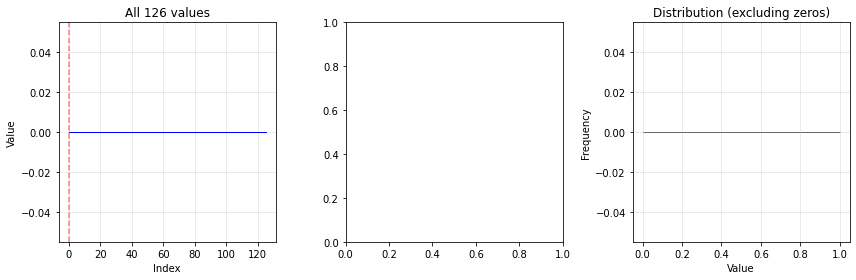

🔍 QUICK DATASET ANALYSIS
Total .npy files: 216900

📁 By phrase folder:
  0: 3600 files
  1: 3600 files
  10: 3600 files
  11: 3600 files
  12: 3600 files
  13: 3600 files
  14: 3600 files
  15: 3660 files
  16: 3660 files
  17: 3660 files
  18: 3660 files
  19: 3660 files
  2: 3600 files
  20: 3660 files
  21: 3660 files
  22: 3660 files
  23: 3660 files
  24: 3660 files
  25: 3660 files
  26: 3660 files
  27: 3660 files
  28: 3660 files
  29: 3660 files
  3: 3600 files
  30: 3600 files
  31: 3600 files
  32: 3600 files
  33: 3600 files
  34: 3600 files
  35: 3600 files
  36: 3600 files
  37: 3600 files
  38: 3600 files
  39: 3600 files
  4: 3600 files
  40: 3600 files
  41: 3600 files
  42: 3600 files
  43: 3600 files
  44: 3600 files
  45: 3600 files
  46: 3600 files
  47: 3600 files
  48: 3600 files
  49: 3600 files
  5: 3600 files
  50: 3600 files
  51: 3600 files
  52: 3600 files
  53: 3600 files
  54: 3600 files
  55: 3600 files
  56: 3600 files
  57: 3600 files
  58: 3600 files


In [ ]:


import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = '/home/yadanar/Desktop/School Work/Advance Topic in Global Software Engineering/Vietnamese-Sign-Language-Translation/Sign Language Translator/Data/toi thay nho ban/18/2.npy'
data = np.load(file_path)

print("=== DETAILED ANALYSIS ===")
print(f"Total values: {len(data)}")
print(f"Non-zero values: {np.count_nonzero(data)}")
print(f"Zero values: {np.sum(data == 0)}")
print(f"Percentage zeros: {np.sum(data == 0)/len(data)*100:.1f}%")

# Find where zeros start
first_zero_index = np.where(data == 0)[0]
if len(first_zero_index) > 0:
    print(f"First zero at index: {first_zero_index[0]}")

# Check if zeros are only at the end
if np.all(data[first_zero_index[0]:] == 0):
    print("All zeros are at the end (padding)")
    useful_data = data[:first_zero_index[0]]
    print(f"Useful data length: {len(useful_data)}")
else:
    print("Zeros are scattered throughout")
    useful_data = data

# Plot the data
plt.figure(figsize=(12, 4))

# Plot 1: All values
plt.subplot(1, 3, 1)
plt.plot(data, 'b-', linewidth=1)
plt.axvline(x=first_zero_index[0] if len(first_zero_index) > 0 else len(data),
            color='r', linestyle='--', alpha=0.5)
plt.title(f'All {len(data)} values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True, alpha=0.3)

# Plot 2: Non-zero values only
plt.subplot(1, 3, 2)
non_zero_indices = np.where(data != 0)[0]
if len(non_zero_indices) > 0:
    plt.plot(non_zero_indices, data[data != 0], 'g.', markersize=3)
    plt.title(f'{len(non_zero_indices)} non-zero values')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.grid(True, alpha=0.3)

# Plot 3: Histogram of values
plt.subplot(1, 3, 3)
plt.hist(data[data != 0], bins=50, alpha=0.7, edgecolor='black')
plt.title('Distribution (excluding zeros)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


import os
import numpy as np
from pathlib import Path

# Quick analysis - just tell me what you have
base_path = Path('/home/yadanar/Desktop/School Work/Advance Topic in Global Software Engineering/Vietnamese-Sign-Language-Translation/Sign Language Translator/Data')

print("🔍 QUICK DATASET ANALYSIS")
print("=" * 40)

# Count all .npy files
all_npy = list(base_path.rglob('*.npy'))
print(f"Total .npy files: {len(all_npy)}")

# Count by phrase
print("\n📁 By phrase folder:")
phrase_counts = {}
for npy_file in all_npy:
    # Get phrase name (folder name)
    phrase = npy_file.parent.name
    phrase_counts[phrase] = phrase_counts.get(phrase, 0) + 1

for phrase, count in sorted(phrase_counts.items()):
    print(f"  {phrase}: {count} files")

# Check data quality
print("\n📊 Data quality check (sampling 20 random files):")
import random
sample_files = random.sample(all_npy, min(20, len(all_npy)))

zero_files = 0
valid_files = 0
shapes = {}

for file in sample_files:
    try:
        data = np.load(file)
        shape = data.shape
        shapes[shape] = shapes.get(shape, 0) + 1

        if np.all(data == 0):
            zero_files += 1
        elif np.any(data != 0):
            valid_files += 1
    except:
        continue

print(f"  Valid files (non-zero): {valid_files}")
print(f"  Zero files: {zero_files}")
print(f"  Common shapes: {shapes}")

# Find ONE good file to examine
print("\n🔎 Looking for one good file to examine...")
for file in all_npy[:100]:  # Check first 100
    try:
        data = np.load(file)
        if np.any(data != 0) and data.shape == (126,):
            print(f"✅ Found: {file.relative_to(base_path)}")
            print(f"   Non-zero values: {np.count_nonzero(data)}")
            print(f"   First 3 values: {data[:3]}")
            break
    except:
        continue
